In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [ ]:
company = pd.read_csv("/content/companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [ ]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [ ]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [ ]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [ ]:
company.drop(['region','city','state_code'], axis=1, inplace=True)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [ ]:
company.drop([ 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1, inplace=True)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [ ]:
company.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1, inplace=True)

#### 1.d. Delete duplicate values if found any.

In [ ]:
# Delete duplicate values if found any.
company.duplicated().value_counts()

False    109464
True      87089
dtype: int64

In [ ]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!

In [ ]:
# Let's delete all the duplicate values
company.drop_duplicates(keep='first', inplace=True)

In [ ]:
# check if any left
company.duplicated().value_counts()


False    109464
dtype: int64

#### 1.e. Delete those which has more than 98% of null values.

In [ ]:
company.isnull().sum()

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [ ]:
# # Since we can see only nan values so et's check how much of ros has nan values.
(company.isna().sum() / len(company))*100

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64

In [ ]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','first_milestone_at','last_milestone_at','first_funding_at','last_funding_at','investment_rounds','ROI'], axis=1, inplace=True)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [ ]:
company['status'].isna().sum()

0

In [ ]:
company['country_code'].isna().sum()

24870

In [ ]:
company['category_code'].isna().sum()

12230

In [ ]:
company['founded_at'].isna().sum()

26913

In [ ]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.dropna(subset=['status','country_code','category_code','founded_at'], inplace=True)

In [ ]:
company['status'].isna().sum()
company['country_code'].isna().sum()
company['category_code'].isna().sum()
company['founded_at'].isna().sum()

0

In [ ]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

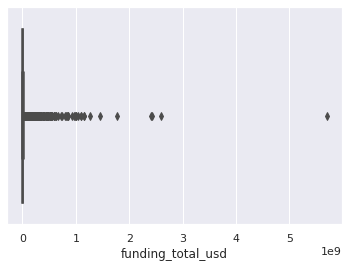

In [ ]:
sns.boxplot(x=company.funding_total_usd)

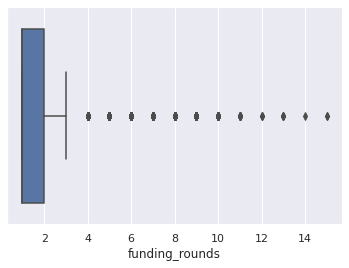

In [ ]:
sns.boxplot(x=company.funding_rounds)

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [ ]:
# For funding_total_usd
q1_ft,q3_ft = np.percentile(company.funding_total_usd.dropna(), [25,75])
iqr_ft = q3_ft - q1_ft
print('IQR for funding_total_usd', iqr_ft)

# For funding_rounds
q1_fr,q3_fr = np.percentile(company.funding_rounds.dropna(), [25,75])
iqr_fr = q3_fr - q1_fr
print('IQR for funding_rounds', iqr_fr)

IQR for funding_total_usd 11488962.0
IQR for funding_rounds 1.0


#### 2.b.1. Find the Upper and Lower limit

In [ ]:
# For funding_total_usd
lower_ft = q1_ft - 1.5 * iqr_ft
upper_ft = q3_ft + 1.5 * iqr_ft
print('upper funding_total_usd', upper_ft)
print('lower funding_total_usd', lower_ft)

# For funding_rounds
lower_fr = q1_fr - 1.5 * iqr_fr
upper_fr = q3_fr + 1.5 * iqr_fr
print('upper funding_total_usd', upper_fr)
print('lower funding_total_usd', lower_fr)


upper funding_total_usd 29233443.0
lower funding_total_usd -16722405.0
upper funding_total_usd 3.5
lower funding_total_usd -0.5


#### 2.b.1.  Find outliers

In [ ]:
# For funding_total_usd
out_free_ftu=[]
for i in company['funding_total_usd']:
    if((i > lower_ft) & (i < upper_ft )):
        out_free_ftu.append(i)
        
print('outliers free list in funding_total_usd :',out_free_ftu)

# For funding_rounds
out_free_fr = []
for i in company['funding_rounds']:
    if((i > lower_fr) & (i < upper_fr )):
        out_free_fr.append(i)
        
print('outliers free list in funding_rounds :',out_free_fr)

outliers free list in funding_total_usd : [5000000.0, 10125293.0, 250000.0, 100000.0, 11300000.0, 414840.0, 1500000.0, 2500000.0, 40000.0, 840000.0, 350000.0, 559522.0, 3100000.0, 100000.0, 45000.0, 3933515.0, 280000.0, 5000000.0, 182500.0, 4815940.0, 16000000.0, 1613875.0, 720000.0, 4350000.0, 4000000.0, 3268000.0, 8500000.0, 250000.0, 1310000.0, 800000.0, 10200000.0, 205000.0, 13800000.0, 1000000.0, 15286415.0, 27000000.0, 3500000.0, 230000.0, 375000.0, 450000.0, 14229998.0, 500000.0, 100000.0, 27100000.0, 24300000.0, 1750000.0, 17900000.0, 13900000.0, 150000.0, 75000.0, 3000000.0, 8829914.0, 27200000.0, 16000000.0, 1100000.0, 12322500.0, 225000.0, 26752221.0, 50000.0, 14734000.0, 1200000.0, 138000.0, 1300000.0, 18000000.0, 150000.0, 3000000.0, 5395000.0, 21189.0, 1835000.0, 1000000.0, 895000.0, 155000.0, 1682618.0, 3242399.0, 1616176.0, 50000.0, 2475000.0, 952578.0, 13250000.0, 509412.0, 7385500.0, 12100000.0, 25830908.0, 109018.0, 1700000.0, 19500000.0, 900000.0, 50000.0, 18664050.

#### 2.b.1. Drop the outliers

In [ ]:
# For funding_total_usd
filter1 = company['funding_total_usd'] > upper_ft
filter2 = company['funding_total_usd'] < lower_ft
company.drop(company[filter1 & filter2].index,inplace=True)


#for funding rounds
filter3 = company['funding_total_usd'] > upper_ft
filter4 = company['funding_total_usd'] < lower_ft
company.drop(company[filter3 & filter4].index, inplace=True)


In [ ]:
company.shape

(63585, 11)

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [ ]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.
company.closed_at.isna().sum()

61924

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [ ]:
# For founded_at
company['founded_at'] = company['founded_at'].astype('datetime64[ns]')
company['founded_at'] = pd.DatetimeIndex(company['founded_at']).year



# closed_at
company['closed_at'] = company['closed_at'].astype('datetime64[ns]')
company['closed_at'] = pd.DatetimeIndex(company['closed_at']).year

# # first_funding_at
#company['first_funding_at'] = company['first_funding_at'].astype('datetime64[ns]')
#company['first_funding_at'] = pd.DatetimeIndex(company['first_funding_at']).year

# # last_funding_at
#company['last_funding_at'] = company['last_funding_at'].astype('datetime64[ns]')
#company['last_funding_at'] = pd.DatetimeIndex(company['last_funding_at']).year

# # first_milestone_at
#company['first_milestone_at'] = company['first_milestone_at'].astype('datetime64[ns]')
#company['first_milestone_at'] = pd.DatetimeIndex(company['first_milestone_at']).year

# # last_milestone_at
#company['last_milestone_at'] = company['last_milestone_at'].astype('datetime64[ns]')
#company['last_milestone_at'] = pd.DatetimeIndex(company['last_milestone_at']).year

company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [ ]:
# 1. category_code
company['category_code'].value_counts()[:14]

software            11360
web                  7937
ecommerce            4984
other                4738
mobile               3926
advertising          3754
games_video          2918
consulting           2806
enterprise           2773
biotech              2534
public_relations     1595
hardware             1557
network_hosting      1348
education            1191
Name: category_code, dtype: int64

In [ ]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.

need = ['software','web','ecommerce','consulting','mobile','games_video','enterprise',
       'public_relations', 'network_hosting','hardware','education','search','biotech']
need

['software',
 'web',
 'ecommerce',
 'consulting',
 'mobile',
 'games_video',
 'enterprise',
 'public_relations',
 'network_hosting',
 'hardware',
 'education',
 'search',
 'biotech']

In [ ]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

company['category_code'] = np.where(company['category_code'].isin(need), company['category_code'], 'other')

In [ ]:
company.category_code.value_counts().to_frame()

,category_code
other,17648
software,11360
web,7937
ecommerce,4984
mobile,3926
games_video,2918
consulting,2806
enterprise,2773
biotech,2534
public_relations,1595


In [ ]:
# Let's check if we've more than 15 columns
len(company.category_code.unique().tolist())

14

In [ ]:
# One-hot encoding to category_code
company=pd.get_dummies(company, columns=['category_code'])

### Let's encode 'country' column now.

In [ ]:
# 1. country_code
company.country_code.value_counts(ascending=False).to_frame()

,country_code
USA,36778
GBR,5101
IND,3018
CAN,2688
DEU,1409
...,...
BEN,1
PCN,1
MDG,1
IOT,1


In [ ]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

need_c = ['USA','GBR','IND','CAN','DEU','AUS','FRA','ESP','NLD','ISR','IRL','BRA']
need_c


['USA',
 'GBR',
 'IND',
 'CAN',
 'DEU',
 'AUS',
 'FRA',
 'ESP',
 'NLD',
 'ISR',
 'IRL',
 'BRA']

In [ ]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

company['country_code'] = np.where(company['country_code'].isin(need_c), company['country_code'], 'other')

In [ ]:

len(company.country_code.unique().tolist())

13

In [ ]:
# One-hot encoding to category_code
company=pd.get_dummies(company, columns=['country_code'])

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [ ]:
#Type your code here!

In [ ]:
#Type your code here!

In [ ]:
#Type your code here!

#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [ ]:
company['isClosed']=company['status'].map({'operating':1,'ipo':1,'acquired':0,'closed':0})

In [ ]:
company['isClosed'].value_counts()

1    58059
0     5526
Name: isClosed, dtype: int64

In [ ]:
# replacing the values at closed_at column
close_detail = company['closed_at']
status = company['status']

new_close = []
zip_obj = zip(status, close_detail)

for status, close_detail in zip_obj:
    if (status == 'acquired'):
        close = close_detail
        new_close.append(close)
    elif (status == 'closed'):
        close = close_detail
        new_close.append(close)
    else:
        close = '2021'
        new_close.append(close)
        
company['closed_at'] = pd.DataFrame(new_close)

In [ ]:
# condition first:
condition_one = company.status == 'operating'
company.closed_at[condition_one]=2021
condition_two = company.status == 'ipo'
company.closed_at[condition_one]=2021
# condition two
condition_three = company.status == 'acquired'
company.closed_at[condition_one]=2021
condition_one = company.status == 'closed'
company.closed_at[condition_one]=2021

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [ ]:
closed_at = company['closed_at']
founded_at = company['founded_at']

active_days = []
zip_object = zip(closed_at, founded_at)

for closed_at, founded_at in zip_object:
    if float(closed_at) > float(founded_at):
        days = float(closed_at)-float(founded_at)
        days = days * 365
        active_days.append(days)
    else:
        idx_name = company[(company['founded_at']==founded_at)&(company['closed_at']==closed_at)].index
        company.drop(idx_name, inplace=True)
        
company['active_days'] = pd.DataFrame(active_days)

In [ ]:
# since there are many negative values, so replacing them with null values
condition = company['active_days'] < 0
company.active_days[condition] = np.nan

#### 2.b.iii. Then, delete the closed_at column.

In [ ]:
company.drop(['closed_at'], axis=1, inplace=True)

### Let's work on target variabe now.

In [ ]:
company.status.value_counts()

operating    57447
acquired      3896
closed        1629
ipo            611
Name: status, dtype: int64

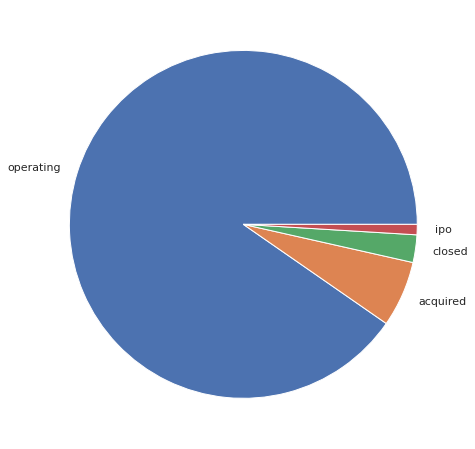

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(company['status'].value_counts()/len(company)*100, labels = company.status.unique())
plt.show()

### Remove the null vaues with the mean value in 'Numerical Data'

In [ ]:
company._get_numeric_data()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,category_code_ecommerce,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2005,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,0,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
5,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,0,0,...,0,0,0,0,0,0,0,1,1,4745.0
6,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0,0,0,...,0,0,1,0,0,0,0,0,1,4745.0
12,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,0,0,...,0,0,0,0,0,0,1,0,1,6570.0
13,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0,0,0,...,0,0,0,0,0,0,1,0,0,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,2007,NaN,NaN,2.0,5.0,37.774929,-122.419415,0,0,1,...,0,0,0,0,0,0,1,0,1,NaN
196549,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0,0,0,...,0,0,0,0,0,0,1,0,1,NaN
196550,1959,NaN,NaN,3.0,44.0,38.882334,-77.171091,0,1,0,...,0,0,0,0,0,0,1,0,1,NaN
196551,2008,NaN,NaN,NaN,1.0,34.052234,-118.243685,0,0,0,...,0,0,0,0,0,0,1,0,1,NaN


In [ ]:
features_mean = ['funding_total_usd','funding_rounds','milestones']
for x in company[features_mean]:
    company[x] = company[x].fillna(company[x].mean())

In [ ]:
company.isna().sum()

status                                0
founded_at                            0
funding_rounds                        0
funding_total_usd                     0
milestones                            0
relationships                     15290
lat                                2374
lng                                2374
category_code_biotech                 0
category_code_consulting              0
category_code_ecommerce               0
category_code_education               0
category_code_enterprise              0
category_code_games_video             0
category_code_hardware                0
category_code_mobile                  0
category_code_network_hosting         0
category_code_other                   0
category_code_public_relations        0
category_code_search                  0
category_code_software                0
category_code_web                     0
country_code_AUS                      0
country_code_BRA                      0
country_code_CAN                      0


In [ ]:
#company.drop(['state_code','founded_at'], axis=1, inplace=True)

In [ ]:
# First let's check how much of rows has nan values and drop them.
company.dropna(inplace=True)

In [ ]:
company.isna().sum()

status                            0
founded_at                        0
funding_rounds                    0
funding_total_usd                 0
milestones                        0
relationships                     0
lat                               0
lng                               0
category_code_biotech             0
category_code_consulting          0
category_code_ecommerce           0
category_code_education           0
category_code_enterprise          0
category_code_games_video         0
category_code_hardware            0
category_code_mobile              0
category_code_network_hosting     0
category_code_other               0
category_code_public_relations    0
category_code_search              0
category_code_software            0
category_code_web                 0
country_code_AUS                  0
country_code_BRA                  0
country_code_CAN                  0
country_code_DEU                  0
country_code_ESP                  0
country_code_FRA            

In [ ]:
company.shape

(16272, 37)

In [ ]:
company.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [ ]:
#Finally Save cleaned Data.
company.to_csv('final_cleaned.csv', index=False)

**Feature Engineering** 

In [ ]:
company['funding_per_round'] = company['funding_total_usd'] / company['funding_rounds']
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days,funding_per_round
0,operating,2005,3.000000,3.975000e+07,5.000000,17.0,47.606209,-122.332071,0,0,...,0,0,0,0,0,1,0,1,5840.0,1.325000e+07
5,operating,2007,1.805575,1.582167e+07,1.415896,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,1,1,4745.0,8.762675e+06
12,operating,2008,1.805575,1.582167e+07,1.000000,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,1,0,1,6570.0,8.762675e+06
13,acquired,2007,1.000000,5.000000e+06,3.000000,14.0,37.386052,-122.083851,0,0,...,0,0,0,0,0,1,0,0,4745.0,5.000000e+06
15,operating,2008,1.805575,1.582167e+07,1.000000,3.0,33.078655,-116.601964,0,0,...,0,0,0,0,0,1,0,1,3285.0,8.762675e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60032,operating,2012,1.000000,5.275000e+05,1.000000,2.0,39.739236,-104.990251,0,0,...,0,0,0,0,0,1,0,1,5110.0,5.275000e+05
60033,operating,2012,1.805575,1.582167e+07,1.000000,2.0,47.570655,-122.222067,0,0,...,0,0,0,0,0,1,0,1,4745.0,8.762675e+06
60034,operating,1998,1.805575,1.582167e+07,1.415896,1.0,36.169941,-115.139830,0,0,...,0,0,0,0,0,1,0,1,5110.0,8.762675e+06
60043,operating,2013,1.805575,1.582167e+07,2.000000,4.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,1,0,1,5110.0,8.762675e+06


In [ ]:
x = company.copy()
y = x.pop('status')

In [ ]:
# selecting discrete features
discrete_features = x.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(x,y,discrete_features=discrete_features,random_state=0)
mi_scores = pd.Series(mi_scores,index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)


In [ ]:
mi_scores

isClosed                          0.255378
founded_at                        0.035417
funding_per_round                 0.033148
funding_total_usd                 0.031830
relationships                     0.027399
funding_rounds                    0.023575
milestones                        0.021959
lng                               0.019441
lat                               0.015212
country_code_USA                  0.010468
country_code_other                0.007167
country_code_BRA                  0.005855
category_code_biotech             0.004593
country_code_ISR                  0.003606
category_code_mobile              0.003112
country_code_NLD                  0.002812
category_code_web                 0.002609
country_code_GBR                  0.001898
category_code_consulting          0.001880
category_code_network_hosting     0.001233
country_code_DEU                  0.001043
country_code_AUS                  0.000926
country_code_FRA                  0.000724
category_co

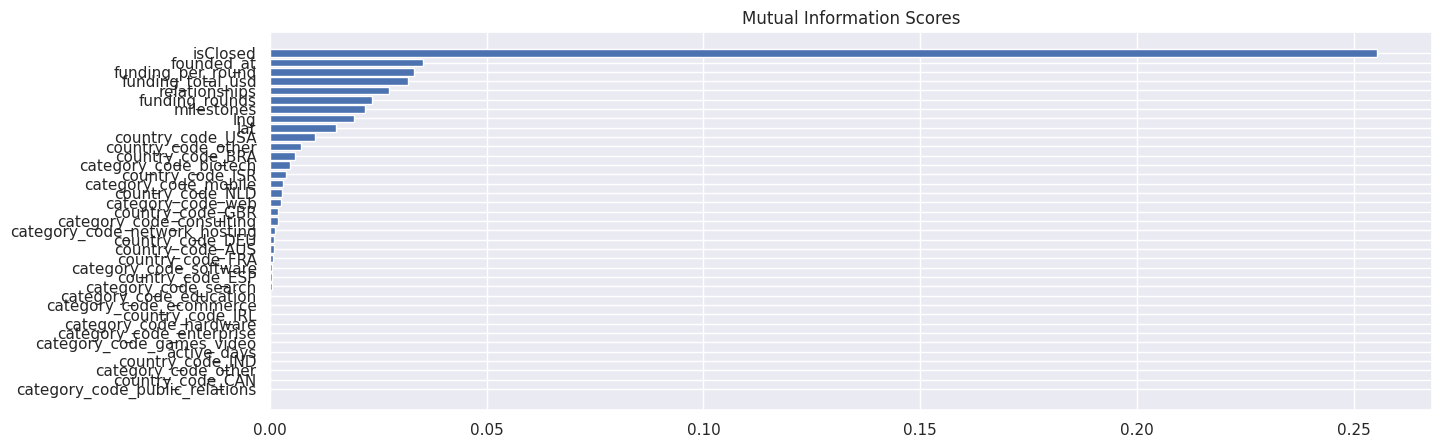

In [ ]:
# using bar plot to make the comparison clear
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(15, 5))
plot_mi_scores(mi_scores)

In [ ]:
company = company.loc[:,mi_scores.index.tolist()]
company

,isClosed,founded_at,funding_per_round,funding_total_usd,relationships,funding_rounds,milestones,lng,lat,country_code_USA,...,category_code_ecommerce,country_code_CAN,category_code_other,country_code_IND,country_code_IRL,category_code_games_video,category_code_enterprise,category_code_hardware,active_days,category_code_public_relations
0,1,2005,1.325000e+07,3.975000e+07,17.0,3.000000,5.000000,-122.332071,47.606209,1,...,0,0,0,0,0,0,0,0,5840.0,0
5,1,2007,8.762675e+06,1.582167e+07,2.0,1.805575,1.415896,-9.598107,30.427755,0,...,0,0,1,0,0,0,0,0,4745.0,0
12,1,2008,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-105.937799,35.686975,1,...,0,0,1,0,0,0,0,0,6570.0,0
13,0,2007,5.000000e+06,5.000000e+06,14.0,1.000000,3.000000,-122.083851,37.386052,1,...,0,0,0,0,0,0,0,0,4745.0,0
15,1,2008,8.762675e+06,1.582167e+07,3.0,1.805575,1.000000,-116.601964,33.078655,1,...,0,0,0,0,0,1,0,0,3285.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60032,1,2012,5.275000e+05,5.275000e+05,2.0,1.000000,1.000000,-104.990251,39.739236,1,...,0,0,0,0,0,0,0,0,5110.0,0
60033,1,2012,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-122.222067,47.570655,1,...,1,0,0,0,0,0,0,0,4745.0,0
60034,1,1998,8.762675e+06,1.582167e+07,1.0,1.805575,1.415896,-115.139830,36.169941,1,...,0,0,0,0,0,0,0,1,5110.0,0
60043,1,2013,8.762675e+06,1.582167e+07,4.0,1.805575,2.000000,-122.419415,37.774929,1,...,0,0,0,0,0,0,0,0,5110.0,0


PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
company_scaled = scaler.fit_transform(company)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(company_scaled)
explained_var = pca.explained_variance_ratio_

Text(0.5, 1.0, '% Explained Variance')

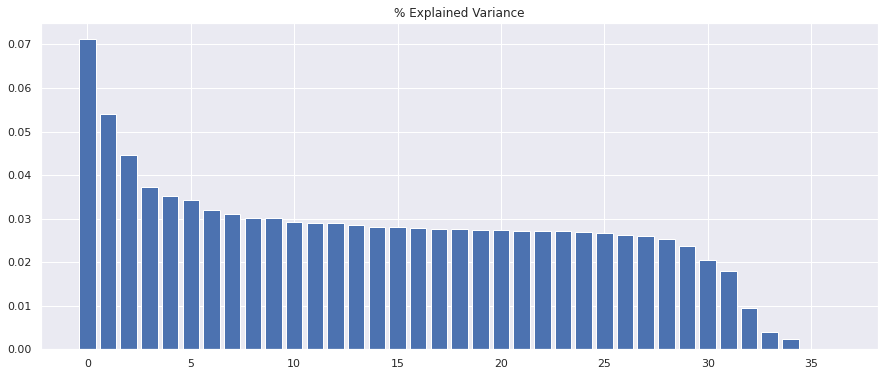

In [ ]:
# plot the explained variance
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),explained_var)
plt.title("% Explained Variance")

Text(0.5, 1.0, '% cumulative Variance')

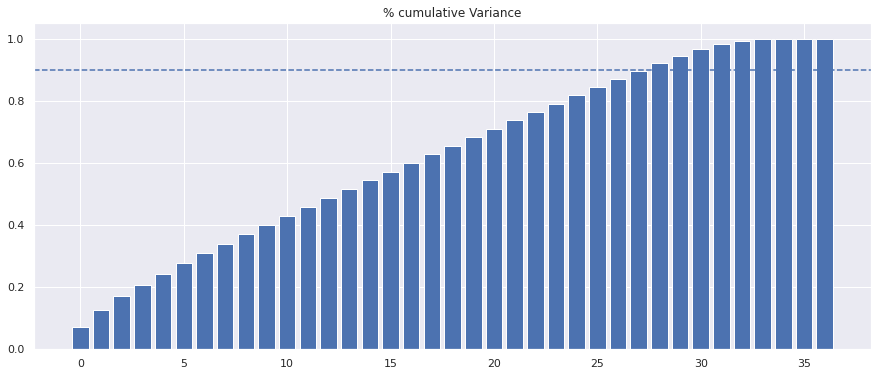

In [ ]:
# cumulative variance
cum_var = np.cumsum(explained_var)
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),cum_var)
plt.axhline(y = 0.9 , linestyle = "--")
plt.title("% cumulative Variance")

In [ ]:
# we can explain 90% of the data with 7 components
pca = PCA(n_components=7 , random_state=0)
company_pca = pca.fit_transform(company_scaled)

In [ ]:
component_names = [f'PC{i+1}' for i in range(df_pca.shape[1])]
company_pca = pd.DataFrame(company_pca,columns=component_names)

In [ ]:
#print pca
company_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.035661,1.433725,-0.520417,-3.140602,1.357975,-2.293382,-0.564247
1,-1.548374,0.466994,-0.033067,-0.653652,-1.972354,0.251470,1.244600
2,1.076601,-0.428530,-0.498037,0.481550,-1.803512,-0.059561,0.177817
3,2.186957,-0.306942,-0.702380,-1.244817,1.900915,-1.631735,-0.191223
4,0.943935,-0.336028,-0.316885,0.567094,0.321649,-0.413797,0.994055
...,...,...,...,...,...,...,...
16267,0.679894,-1.296332,-0.236117,1.184447,0.915296,-1.574489,-0.099415
16268,0.821461,-0.516227,-0.127144,1.409418,-0.131507,0.173681,-1.831023
16269,1.518245,-0.258302,-0.414539,0.198397,0.235634,0.631150,-1.235061
16270,1.371829,-0.294723,-0.425832,0.260519,1.011801,-1.945160,-0.169928


## MODEL BUILDING


In [ ]:
company.columns

Index(['isClosed', 'founded_at', 'funding_per_round', 'funding_total_usd',
       'relationships', 'funding_rounds', 'milestones', 'lng', 'lat',
       'country_code_USA', 'country_code_other', 'country_code_BRA',
       'category_code_biotech', 'country_code_ISR', 'category_code_mobile',
       'country_code_NLD', 'category_code_web', 'country_code_GBR',
       'category_code_consulting', 'category_code_network_hosting',
       'country_code_DEU', 'country_code_AUS', 'country_code_FRA',
       'category_code_software', 'country_code_ESP', 'category_code_search',
       'category_code_education', 'category_code_ecommerce',
       'country_code_CAN', 'category_code_other', 'country_code_IND',
       'country_code_IRL', 'category_code_games_video',
       'category_code_enterprise', 'category_code_hardware', 'active_days',
       'category_code_public_relations'],
      dtype='object')

In [ ]:
x

,isClosed,founded_at,funding_per_round,funding_total_usd,relationships,funding_rounds,milestones,lng,lat,country_code_USA,...,category_code_ecommerce,country_code_CAN,category_code_other,country_code_IND,country_code_IRL,category_code_games_video,category_code_enterprise,category_code_hardware,active_days,category_code_public_relations
0,1,2005,1.325000e+07,3.975000e+07,17.0,3.000000,5.000000,-122.332071,47.606209,1,...,0,0,0,0,0,0,0,0,5840.0,0
5,1,2007,8.762675e+06,1.582167e+07,2.0,1.805575,1.415896,-9.598107,30.427755,0,...,0,0,1,0,0,0,0,0,4745.0,0
12,1,2008,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-105.937799,35.686975,1,...,0,0,1,0,0,0,0,0,6570.0,0
13,0,2007,5.000000e+06,5.000000e+06,14.0,1.000000,3.000000,-122.083851,37.386052,1,...,0,0,0,0,0,0,0,0,4745.0,0
15,1,2008,8.762675e+06,1.582167e+07,3.0,1.805575,1.000000,-116.601964,33.078655,1,...,0,0,0,0,0,1,0,0,3285.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60032,1,2012,5.275000e+05,5.275000e+05,2.0,1.000000,1.000000,-104.990251,39.739236,1,...,0,0,0,0,0,0,0,0,5110.0,0
60033,1,2012,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-122.222067,47.570655,1,...,1,0,0,0,0,0,0,0,4745.0,0
60034,1,1998,8.762675e+06,1.582167e+07,1.0,1.805575,1.415896,-115.139830,36.169941,1,...,0,0,0,0,0,0,0,1,5110.0,0
60043,1,2013,8.762675e+06,1.582167e+07,4.0,1.805575,2.000000,-122.419415,37.774929,1,...,0,0,0,0,0,0,0,0,5110.0,0


In [ ]:
x

,isClosed,founded_at,funding_per_round,funding_total_usd,relationships,funding_rounds,milestones,lng,lat,country_code_USA,...,category_code_ecommerce,country_code_CAN,category_code_other,country_code_IND,country_code_IRL,category_code_games_video,category_code_enterprise,category_code_hardware,active_days,category_code_public_relations
0,1,2005,1.325000e+07,3.975000e+07,17.0,3.000000,5.000000,-122.332071,47.606209,1,...,0,0,0,0,0,0,0,0,5840.0,0
5,1,2007,8.762675e+06,1.582167e+07,2.0,1.805575,1.415896,-9.598107,30.427755,0,...,0,0,1,0,0,0,0,0,4745.0,0
12,1,2008,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-105.937799,35.686975,1,...,0,0,1,0,0,0,0,0,6570.0,0
13,0,2007,5.000000e+06,5.000000e+06,14.0,1.000000,3.000000,-122.083851,37.386052,1,...,0,0,0,0,0,0,0,0,4745.0,0
15,1,2008,8.762675e+06,1.582167e+07,3.0,1.805575,1.000000,-116.601964,33.078655,1,...,0,0,0,0,0,1,0,0,3285.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60032,1,2012,5.275000e+05,5.275000e+05,2.0,1.000000,1.000000,-104.990251,39.739236,1,...,0,0,0,0,0,0,0,0,5110.0,0
60033,1,2012,8.762675e+06,1.582167e+07,2.0,1.805575,1.000000,-122.222067,47.570655,1,...,1,0,0,0,0,0,0,0,4745.0,0
60034,1,1998,8.762675e+06,1.582167e+07,1.0,1.805575,1.415896,-115.139830,36.169941,1,...,0,0,0,0,0,0,0,1,5110.0,0
60043,1,2013,8.762675e+06,1.582167e+07,4.0,1.805575,2.000000,-122.419415,37.774929,1,...,0,0,0,0,0,0,0,0,5110.0,0


In [ ]:
y

0        operating
5        operating
12       operating
13        acquired
15       operating
           ...    
60032    operating
60033    operating
60034    operating
60043    operating
60068    operating
Name: status, Length: 16272, dtype: object

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [125]:
#prediction
pred1 = lr.predict(x_test)

In [126]:
pred1

array(['operating', 'operating', 'operating', ..., 'operating',
       'operating', 'operating'], dtype=object)

Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
pred2 = dt.predict(x_test)

In [133]:
pred2

array(['operating', 'operating', 'operating', ..., 'operating',
       'operating', 'operating'], dtype=object)

# Model Performance



Logistics Regression

In [135]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,pred1)
cm1

array([[   0,    0,    0,  158],
       [   0,    0,    0,   67],
       [   0,    0,    2,   19],
       [   0,    0,    1, 3008]])

Text(66.5, 0.5, 'Actual Values')

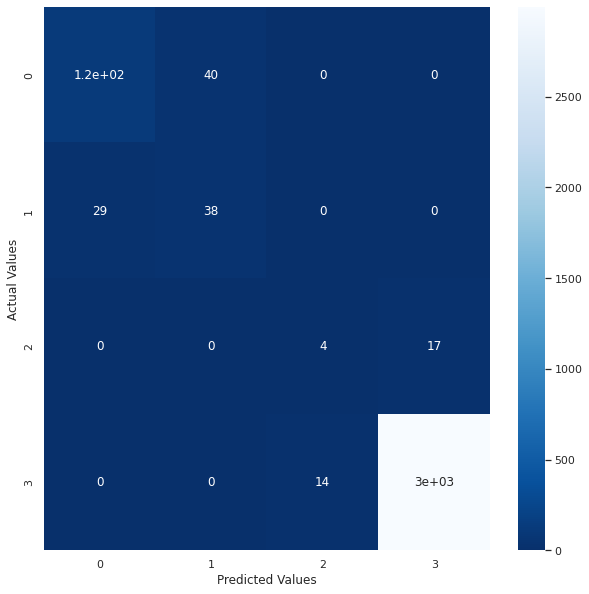

In [136]:
fig=plt.figure(figsize=(10,10))
cm1_plot=sns.heatmap(cm,annot=True,cmap='Blues_r')
cm1_plot.set_xlabel("Predicted Values")
cm1_plot.set_ylabel("Actual Values")

In [137]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,pred1)
acc

0.9247311827956989

Decision Tree

In [142]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,pred2)
cm2

array([[ 118,   40,    0,    0],
       [  29,   38,    0,    0],
       [   0,    0,    4,   17],
       [   0,    0,   14, 2995]])

Text(66.5, 0.5, 'Actual Values')

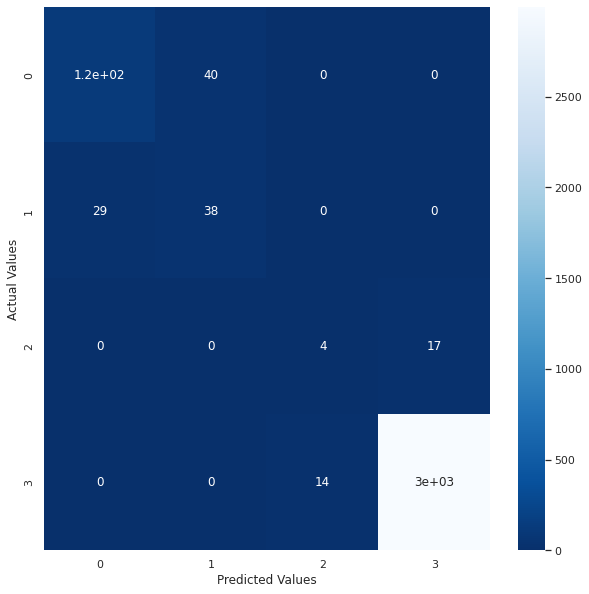

In [143]:
fig=plt.figure(figsize=(10,10))
cm2_plot=sns.heatmap(cm2,annot=True,cmap='Blues_r')
cm2_plot.set_xlabel("Predicted Values")
cm2_plot.set_ylabel("Actual Values")

In [144]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,pred2)
acc

0.9692780337941628